In [1]:
from subprocess import check_output
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
num_classes = 10
epochs = 20

In [2]:
(trainX, trainY), (validateX, validateY) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
trainX.shape

(60000, 28, 28)

In [3]:
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols)

**[DNN model - default Adam - and dropout]**

In [4]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [5]:
def get_fashion_model_mnist_dnn():
  model = models.Sequential()
  model.add(layers.Dense(units = 128, activation = "relu", input_shape = (image_shape[0]*image_shape[1], )))
  model.add(Dropout(0.2))
  model.add(layers.Dense(units = 64, activation = "relu"))
  model.add(Dropout(0.2))
  model.add(layers.Dense(units = 32, activation = "relu"))
  model.add(Dropout(0.2))
  model.add(layers.Dense(units = 10, activation = "softmax"))
  return  model

In [6]:
fashion_model_mnist_dnn = get_fashion_model_mnist_dnn()

In [7]:
fashion_model_mnist_dnn.compile(optimizer = "rmsprop", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [8]:
flattenedTrainX = trainX.reshape(60000, 28*28)
flattenedValidateX = validateX.reshape(10000, 28*28)

In [9]:
tf.config.run_functions_eagerly(True)
history_dnn = fashion_model_mnist_dnn.fit(flattenedTrainX, trainY, batch_size = 128, epochs = 75, validation_split=0.2)

Epoch 1/75
375/375 [==============================] - 21s 54ms/step - loss: 4.1398 - accuracy: 0.4631 - val_loss: 0.9278 - val_accuracy: 0.6945
Epoch 2/75
375/375 [==============================] - 23s 61ms/step - loss: 1.0945 - accuracy: 0.6152 - val_loss: 0.8162 - val_accuracy: 0.7094
Epoch 3/75
375/375 [==============================] - 19s 50ms/step - loss: 0.9242 - accuracy: 0.6567 - val_loss: 0.6848 - val_accuracy: 0.7322
Epoch 4/75
375/375 [==============================] - 21s 55ms/step - loss: 0.8426 - accuracy: 0.6793 - val_loss: 0.6522 - val_accuracy: 0.7381
Epoch 5/75
375/375 [==============================] - 20s 53ms/step - loss: 0.7831 - accuracy: 0.6941 - val_loss: 0.6394 - val_accuracy: 0.7370
Epoch 6/75
375/375 [==============================] - 19s 50ms/step - loss: 0.7513 - accuracy: 0.7070 - val_loss: 0.6075 - val_accuracy: 0.7402
Epoch 7/75
375/375 [==============================] - 20s 54ms/step - loss: 0.7189 - accuracy: 0.7135 - val_loss: 0.5887 - val_accuracy:

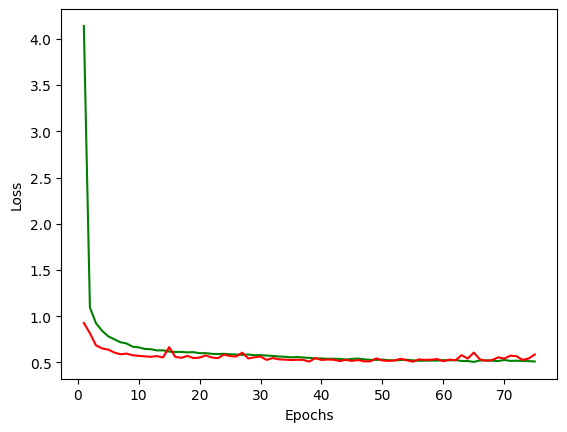

In [10]:
loss = history_dnn.history["loss"]
val_loss = history_dnn.history["val_loss"]
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(range(1,76), loss, "g", label = "Training Loss")
plt.plot(range(1,76), val_loss, "r", label = "Validation Loss")

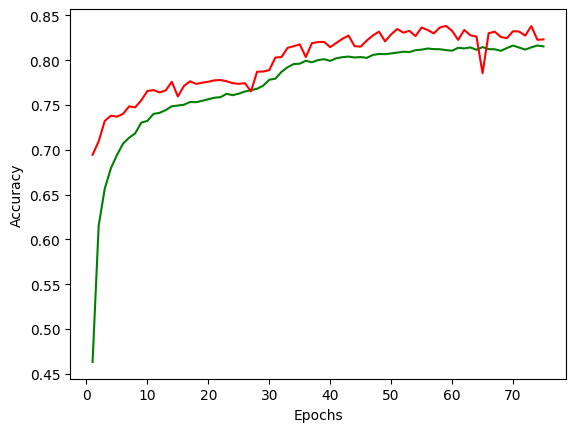

In [11]:
accuracy = history_dnn.history["accuracy"]
val_accuracy = history_dnn.history["val_accuracy"]
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(range(1,76), accuracy, "g", label = "Validation Accuracy")
plt.plot(range(1,76), val_accuracy, "r", label = "Validation Accuracy")